# **Важно!**

Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу выполнено/невыполнено.
*   За каждую выполненую задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция:** выполните задания в этом же ноутбуке (места под решения **каждой** задачи обозначаются как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**).

**Как отправить задание на проверку:** вам необходимо сохранить решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Сроки проверки:** преподаватель проверит домашнее задание в течение недели после дедлайна и даст вам обратную связь.

# **Перед выполнением задания**

1. **Перезапустите ядро (restart the kernel):** в меню выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart).**
2. **Выполните** **все ячейки (run all cells)**: в меню выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert**: если в коде есть ошибки, assert выведет уведомление об ошибке; если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание 4. Линейная классификация. Логистическая регрессия. Метод опорных векторов

**Цели:**
*   Решить проблемы бинарной классификации вручную.
*   Решить многоклассовую классификацию на примере датасета рукописных цифр MNIST с помощью готовых библиотек.
* Реализовать метод опорных векторов.

In [25]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

## Часть 1. Реализация алгоритма линейной классификации для бинарных данных

Создадим синтетический набор бинарных данных и обучим модель вручную. Для этого нам необходимо написать функцию сигмоиды, вычислить функцию потерь и ее производную, чтобы использовать их во время градиентного спуска.

**Задание 1 (1 балл)**

Реализуйте функцию сигмоиды `sigmoid(z)`.

In [26]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def sigmoid(z):
    return 1/ (1 + np.exp(-z))
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [27]:
assert np.isclose(sigmoid(5), 1, atol=0.01)
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


**Задание 2 (1 балл)**

Реализуйте логистическую функцию потерь `compute_cost(y, y_pred)`.



In [28]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def compute_cost(y, y_pred):
    # Для того что бы не получить бесконечности из под логарифма,
    # добавим ограничение
    y_pred = np.clip(y_pred, 1e-7, 1-1e-7)
    # Рассчитаем кросс-энтропию
    loss = -np.mean(y*np.log(y_pred)+(1-y)*np.log(1 - y_pred))
    return loss

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [29]:
y_pred = np.array([0.1, 0.8, 0.4])
y = np.array([0, 1, 0])

assert np.isclose(compute_cost(y, y_pred), 0.28, atol=0.01)
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


**Задание 3 (1 балл)**

Реализуйте градиент логистической функции потерь `compute_gradient(X, y, w)`.

In [30]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
def compute_gradient(X, y, weights):
    # Расчитаем линейную комбинацию весов и признаков
    z = np.dot(X, weights)
    # Применим сигмоиду
    y_pred = sigmoid(z)
    # Рассчитаем антиградиент
    grad = -np.dot(X.T, (y - y_pred)) / len(y)

    return grad

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [31]:
X = np.array([[1, 2], [1, 3], [1, 4]])  # Пример данных с добавленным bias term
y = np.array([0, 1, 0])  # Метки классов
weights = np.array([0.1, -0.2])  # Начальные веса

assert np.allclose(compute_gradient(X, y, weights), [0.04, 0.10], atol=0.01)
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


**Задание 4 (1 балл)**

По аналогии с предыдущим домашним заданием реализуйте функцию градиентного спуска.

In [32]:
# Функция градиентного спуска
def gradient_descent(X, y, w, lr=0.03, num_iter=1000):
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    cost_history = np.zeros(num_iter) # инициируем историю лосов на будущее
    for i in range(num_iter):
        # Расчитаем градиент
        grad = compute_gradient(X, y, w)
        # Обновим веса
        w -= lr * grad
        # Сделаем предсказание
        z = np.dot(X, w)
        y_pred = sigmoid(z)
        # Посчитаем лосс
        loss = compute_cost(y, y_pred)
        # Обновим историю
        cost_history[i] = loss
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return w

In [33]:
X = np.array([[1, 2], [1, 3], [1, 4]])  # Пример данных с добавленным bias term
y = np.array([0, 1, 0])  # Метки классов
weights = np.array([0.1, -0.2])  # Начальные веса

assert np.allclose(gradient_descent(
    X, y, weights, 0.03, 300), [-0.01, -0.22], atol=0.01)
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


**Задание 5 (1 балл)**

Подготовьте синтетические бинарные данные с помощью команды из библиотеки `sklearn`. Используйте функцию `make_classification`. Создайте 200 точек с двумя признаками и двумя классами, без излишних признаков (`n_redundant=0`). Зафиксируйте `random_state=42`. Добавьте столбец единиц к данным для свободного члена.

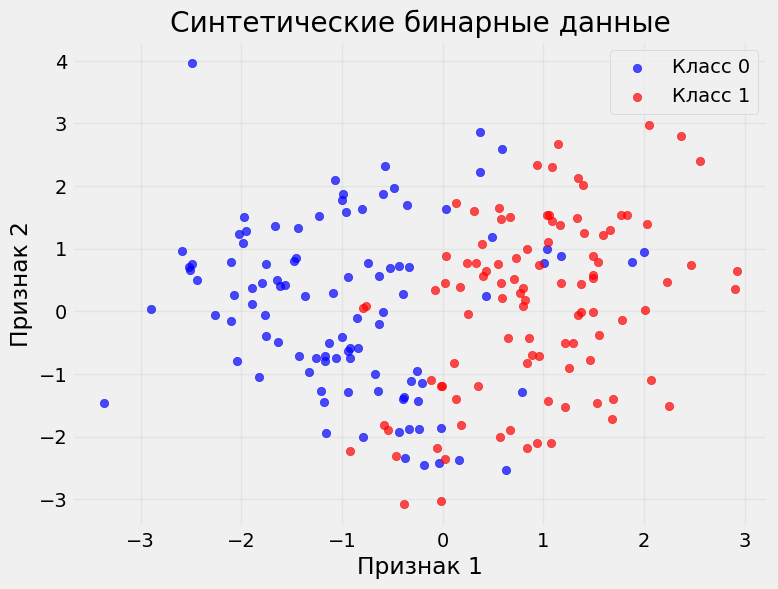

In [34]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X, y = make_classification(
    n_samples=200, n_features=2,
    n_classes=2, n_redundant=0, random_state=42
)
#
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='blue', label='Класс 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='red', label='Класс 1', alpha=0.7)
plt.title("Синтетические бинарные данные")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Задание 6 (1 балл)**

Создайте новую переменную `X_ones`, добавив столбец единиц к данным для свободного члена с помощью `NumPy` команды `concatenate`. Разбейте данные на тренировочную и тестовую выборки, выделив 20% данных под тестирование. Инициализируйте веса `weights` случайным образом.

In [35]:
from sklearn.model_selection import train_test_split
# Не удаляйте и не меняйте seed
np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X_ones = np.hstack((np.ones((X.shape[0], 1)), X))
weights = np.random.randn(X_ones.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_ones, y, test_size=0.2)

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [36]:
assert X_ones.shape[1] == 3 and X_ones.shape[0] == 200
assert weights.shape[0] == 3
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


**Задание 7 (1 балл)**

Обучите модель и предскажите значения для тестовой выборки. Вычислите значение функции потерь для тестовой выборки, `test_cost`.

*Hint!* Не забудьте сигмоиду.

In [37]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
w_new = gradient_descent(X_train, y_train, weights)
z = np.dot(X_test, w_new)
y_pred = sigmoid(z)
test_cost = compute_cost(y_test, y_pred)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [38]:
assert np.isclose(test_cost, 0.3, atol=0.01)
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


## Часть 2. Реализация алгоритма бинарной классификации sklearn. Сравнение результатов

**Задание 8 (1 балл)**

Реализуйте обучение на тех же данных с помощью готовой функции `LogisticRegression` из `sklearn.linear_model`. Предскажите вероятности для тестовой выборки с помощью метода `predict_proba` и оцените качество обучения при помощи `log_loss` из `sklearn.metrics`. Запишите значение функции потерь в переменную `cost_sklearn`.

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
test_proba = log_reg_model.predict_proba(X_test)

cost_sklearn = log_loss(y_test, test_proba)

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [40]:
assert np.isclose(cost_sklearn, 0.3, atol=0.01)
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


Обратите внимание, что мы получили схожие значения функций потерь обоими методами.
Теперь мы можем перейти к многоклассовой классификации.

## Часть 3. Реализация алгоритма многоклассовой классификации на примере данных MNIST



Теперь, когда мы разобрались с тем, как работает обучение модели бинарной классификации, мы можем перейти к проблеме многих классов. В качестве примера рассмотрим задачу классификации рукописных цифр из классического набора данных MNIST. Первым шагом необходимо загрузить данные. Мы будем использовать функцию `load_digits` из модуля `sklearn.datasets`, которая загрузит набор данных MNIST с цифрами от 0 до 9.

In [41]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data # Изображения, преобразованные из матрицы (8, 8) в вектор (64,)
y = digits.target

Для визуализации цифр из набора данных, загруженного с помощью библиотеки scikit-learn, можно использовать функцию `imshow() `библиотеки Matplotlib.

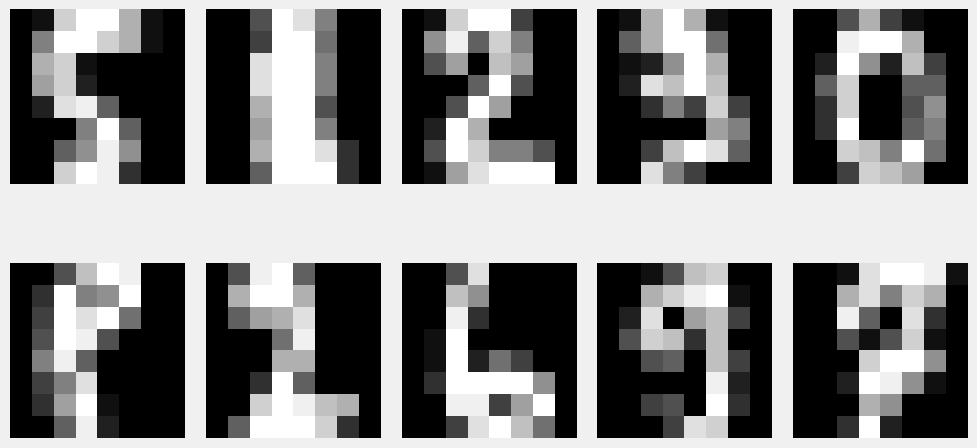

In [42]:
# Визуализация нескольких случайных изображений цифр
indices = np.random.choice(len(X), 10, replace=False)
random_digits = X[indices]

# Создаем сетку 5x2 для отображения изображений
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 6))

# Строим картинки в каждой ячейке сетки
for i, ax in enumerate(axes.flat):
    ax.imshow(random_digits[i].reshape((8,8)), cmap='gray')
    ax.axis('off')  # Убираем оси

# Эта команда помогает избегать наложений объектов графика
plt.tight_layout()
plt.show()

Как обычно, необходимо разделить данные на обучающую и тестовую выборки:

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21)

Для решения задачи многоклассовой классификации с использованием модели перцептрона и стратегии one-vs-one в библиотеке `scikit-learn` можно использовать классификатор `sklearn`.`linear_model.Perceptron`.

`sklearn.linear_model.Perceptron` — это реализация однослойного перцептрона, простого алгоритма для бинарной классификации. Суть его работы заключается в том, что он пытается разделить данные на два класса с помощью линейной границы (гиперплоскости).

Cоздаем объект классификатора Perceptron и устанавливаем параметры модели. В данном случае мы используем параметр tol для задания критерия остановки (требуемой точности решения) и параметр random_state для установки начального состояния генератора случайных чисел, что позволит воспроизвести результаты.

**Задание 9 (1 балл)**

Создайте по экземпляру класса `LogisticRegression` (`sklearn.linear_model`) и `SVC` (`sklearn.svm`). Внимательно почитайте официальную [документацию OneVsRestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), обратите внимание на то, какие аргументы принимает этот класс. Назовите их `softmax_model` и `ovr_model`, соответственно. Обучите обе модели на данных MNIST. Сделайте предсказания для тестовой выборки.

In [44]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

np.random.seed(21)

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
softmax_model = LogisticRegression(max_iter=1000)
svm_model = SVC(max_iter=1000)
ovr_model = OneVsRestClassifier(svm_model)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [45]:
assert type(
    softmax_model) == LogisticRegression and softmax_model.max_iter == 1000
assert type(svm_model) == SVC and svm_model.max_iter == 1000
print("Проверка пройдена!!!!")

Проверка пройдена!!!!


**Задание 10 (1 балл)**

Вычислите и сравните основные метрики классификации. Для вычисления `precision`, `recall` и `F1-score` воспользуйтесь готовыми метриками из библиотки `sklearn.metrics` (найдите названия нужных функций самостоятельно). Укажите аргумент `average='macro'` для вычисления метрик усредненных по категориям. Сохраните значения метрик в переменные:

* `softmax_accuracy_score`
* `softmax_precision_score`
* `softmax_recall_score`
* `softmax_f1_score`


* `svm_accuracy_score`
* `svm_precision_score`
* `svm_recall_score`
* `svm_f1_score`



In [46]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
softmax_model.fit(X_train, y_train)
y_pred_softmax = softmax_model.predict(X_test)

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Просто в предыдущей задаче было упомянуто OVR
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)


softmax_accuracy_score = accuracy_score(y_test, y_pred_softmax)
softmax_precision_score = precision_score(y_test, y_pred_softmax, average="macro")
softmax_recall_score = recall_score(y_test, y_pred_softmax, average="macro")
softmax_f1_score = f1_score(y_test, y_pred_softmax, average="macro")

svm_accuracy_score = accuracy_score(y_test, y_pred_svm)
svm_precision_score = precision_score(y_test, y_pred_svm, average="macro")
svm_recall_score = recall_score(y_test, y_pred_svm, average="macro")
svm_f1_score = f1_score(y_test, y_pred_svm, average="macro")

# Ну и доп OVR
ovr_accuracy_score = accuracy_score(y_test, y_pred_ovr)
ovr_precision_score = precision_score(y_test, y_pred_ovr, average="macro")
ovr_recall_score = recall_score(y_test, y_pred_ovr, average="macro")
ovr_f1_score = f1_score(y_test, y_pred_ovr, average="macro")
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [47]:
# Качество по всем метрикам должно быть выше 95%
print("SOFTMAX_MODEL")
print(f"perceptron_accuracy_score: {softmax_accuracy_score}")
print(f"perceptron_precision_score: {softmax_precision_score}")
print(f"perceptron_recall_score: {softmax_recall_score}")
print(f"perceptron_f1_score: {softmax_f1_score}")


print("---------")
print("SVM_MODEL")

print(f"perceptron_accuracy_score: {svm_accuracy_score}")
print(f"perceptron_precision_score: {svm_precision_score}")
print(f"perceptron_recall_score: {svm_recall_score}")
print(f"perceptron_f1_score: {svm_f1_score}")

print("---------")

# Дополнил OVR
print("OVR_SVM_COVER")

print(f"perceptron_accuracy_score: {ovr_accuracy_score}")
print(f"perceptron_precision_score: {ovr_precision_score}")
print(f"perceptron_recall_score: {ovr_recall_score}")
print(f"perceptron_f1_score: {ovr_f1_score}")

SOFTMAX_MODEL
perceptron_accuracy_score: 0.975
perceptron_precision_score: 0.9755891749496401
perceptron_recall_score: 0.975590939649223
perceptron_f1_score: 0.9753951883808829
---------
SVM_MODEL
perceptron_accuracy_score: 0.9861111111111112
perceptron_precision_score: 0.987139855110248
perceptron_recall_score: 0.9852165435139574
perceptron_f1_score: 0.9859103789515758
---------
OVR_SVM_COVER
perceptron_accuracy_score: 0.9861111111111112
perceptron_precision_score: 0.987078879500492
perceptron_recall_score: 0.9859605911330049
perceptron_f1_score: 0.986234089589715


> OVR обертка над SVM показала неощутимый прирост по полноте и f1 мере


Качество по всем метрикам должно быть выше 95%.

In [48]:
assert softmax_accuracy_score > 0.95
assert softmax_precision_score > 0.95
assert softmax_recall_score > 0.95
assert softmax_f1_score > 0.95

assert ovr_accuracy_score > 0.95
assert ovr_precision_score > 0.95
assert ovr_recall_score > 0.95
assert ovr_f1_score > 0.95

print("Проверка пройдена!!!!")

Проверка пройдена!!!!


# Поздравляем!
В этом домашнем задании вы вручную реализовали алгоритм логистической регрессии с помощью градиентного спуска. Вы углубили навыки пользования библиотекой `sklearn` для обучения моделей, создания синтетических данных и вычисления метрик оценки качества моделей.